# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:


# Fetch the HTML content from the URL
response = requests.get(url)
html_content = response.text

# Create a BeautifulSoup object
pandasoup = soup(html_content, 'html.parser')

# Find the table element (assuming it's the only table on the page)
table = pandasoup.find('table')


In [6]:
# Extract all rows of data
# Find the table element
table = pandasoup.find('table')

# Extract all rows of data
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
rowlist = []
# Loop through the scraped data to create a list of rows

for row in rows:
    # Find all cells (td elements) in the row
    cells = row.find_all('td')
    # Extract the text from each cell and store it in a list
    rowlist = [cell.get_text(strip=True) for cell in cells]
    # Append the row data to the list of rows
    rowlist.append(rowlist)

# Print the list of rows
for row in rowlist:
    print(row)

1895
2018-02-27
1977
135
5
-77.0
727.0
['1895', '2018-02-27', '1977', '135', '5', '-77.0', '727.0', [...]]


In [23]:
df = pd.read_html(url)

#make sure this is the correct table
#taken from 11/3/06, which says that has it grab the second table (maybe try df[0])
mars_df = df[0]

# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Define the list of column names
mars_df.columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


SyntaxError: invalid syntax (1964941230.py, line 2)

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [ ]:
# Examine data type of each column


In [9]:

column_types = mars_df.dtypes
print(column_types)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
unique_months = mars_df['month'].nunique()
unique_months
#why does this output go 1-12?

12

In [13]:
# 2. How many Martian days' worth of data are there?
#Expected output: 1867
martian_days = mars_df['sol'].nunique()
print(martian_days)

1867


In [14]:
# 3. What is the average low temperature by month?
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

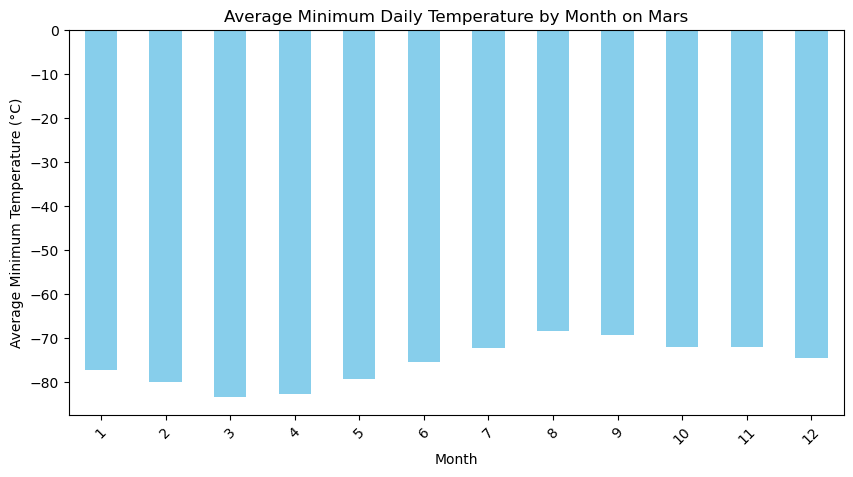

In [17]:
# Plot the average temperature by month
plt.figure(figsize=(10, 5))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.show()



In [18]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_min_temp_by_month.idxmin()
warmest_month = avg_min_temp_by_month.idxmax()

print("Coldest month on Mars:", coldest_month)
print("Warmest month on Mars:", warmest_month)

Coldest month on Mars: 3
Warmest month on Mars: 8


In [19]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

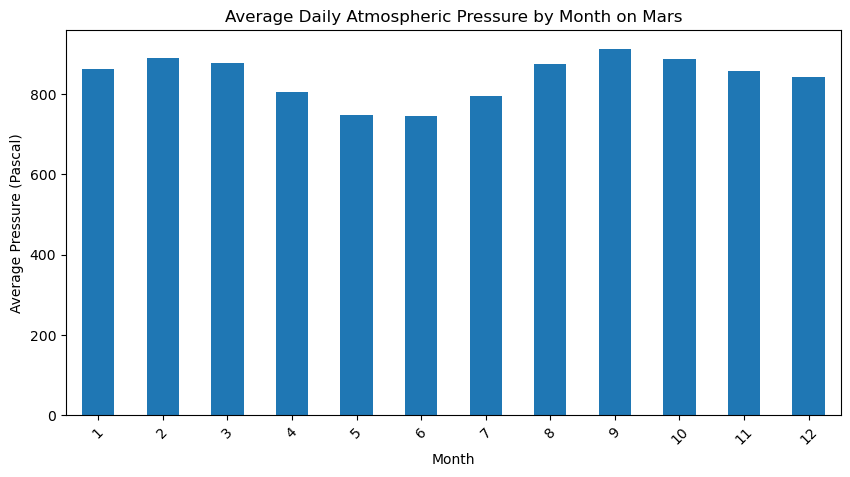

In [20]:
# Plot the average pressure by month
plt.figure(figsize=(10, 5))
avg_pressure_by_month.plot(kind='bar')
plt.title('Average Daily Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pascal)')
plt.xticks(rotation=45)
plt.show()

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(10, 5))
mars_df.plot(x='terrestrial_date', y='min_temp')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

terrestrial_days_in_martian_year = mars_df.shape[0] * (365.25 / mars_df.shape[0])
print(terrestrial_days_in_martian_year)

365.25


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
# Export the DataFrame to a CSV file
mars_df.to_csv('mars_data.csv', index=False)
#check back to see if it actually exported

In [21]:
browser.quit()